In [ ]:
Name:Jami Devi
Regno:22B05A1208
Topic:K-means algorithm by using diabetes dataset
Date:28-08-2023

In [18]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

data = datasets.load_diabetes()
import warnings
warnings.filterwarnings('ignore')

In [19]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [20]:
X = diabetes.data[:,:3]
y = diabetes.target
names = diabetes.feature_names[:3]
X, y = shuffle(X, y, random_state=42)

In [21]:
print(X)

[[ 0.04534098 -0.04464164 -0.00620595]
 [ 0.09256398 -0.04464164  0.03690653]
 [ 0.06350368  0.05068012 -0.00405033]
 ...
 [ 0.03081083 -0.04464164 -0.02021751]
 [-0.01277963 -0.04464164 -0.02345095]
 [-0.09269548 -0.04464164  0.02828403]]


In [22]:
print(y)

[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184. 144. 150. 280. 125.  59.  65. 281. 277. 167.
  90.  72. 178.  88. 270. 101. 197.  97.  53.  71. 262.  52. 102. 166.
 189. 173. 220. 206.  97.  60.  61. 242. 121. 128. 104. 265. 132. 283.
 174. 129. 257. 137.  63.  93. 232. 208. 261. 179. 258. 262.  51. 237.
  71. 139. 268.  69. 317. 249. 154. 192. 116.  81. 122. 259. 191. 292.
  55. 107. 210.  91. 253.  85. 252.  59.  78. 200.  78. 245. 175.  42.
 127.  53.  94. 104. 199. 265. 281. 248. 257. 215. 303. 170.  59. 277.
 209. 138. 198. 124.  96. 288. 225. 265. 101.  55. 198.  51. 252.  64.
 220. 

In [23]:
from tqdm.notebook import tqdm as tqdm
def calculate_WSS(points, kmax):
  sse = []
  for k in tqdm(range(1, kmax+1)):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
 
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse
sse = calculate_WSS(X, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

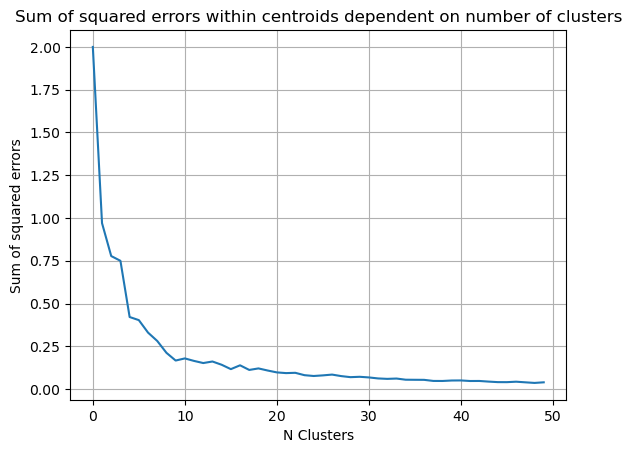

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
plt.plot(sse)
plt.grid()
plt.title('Sum of squared errors within centroids dependent on number of clusters')
plt.xlabel('N Clusters')
plt.ylabel('Sum of squared errors')
plt.show()

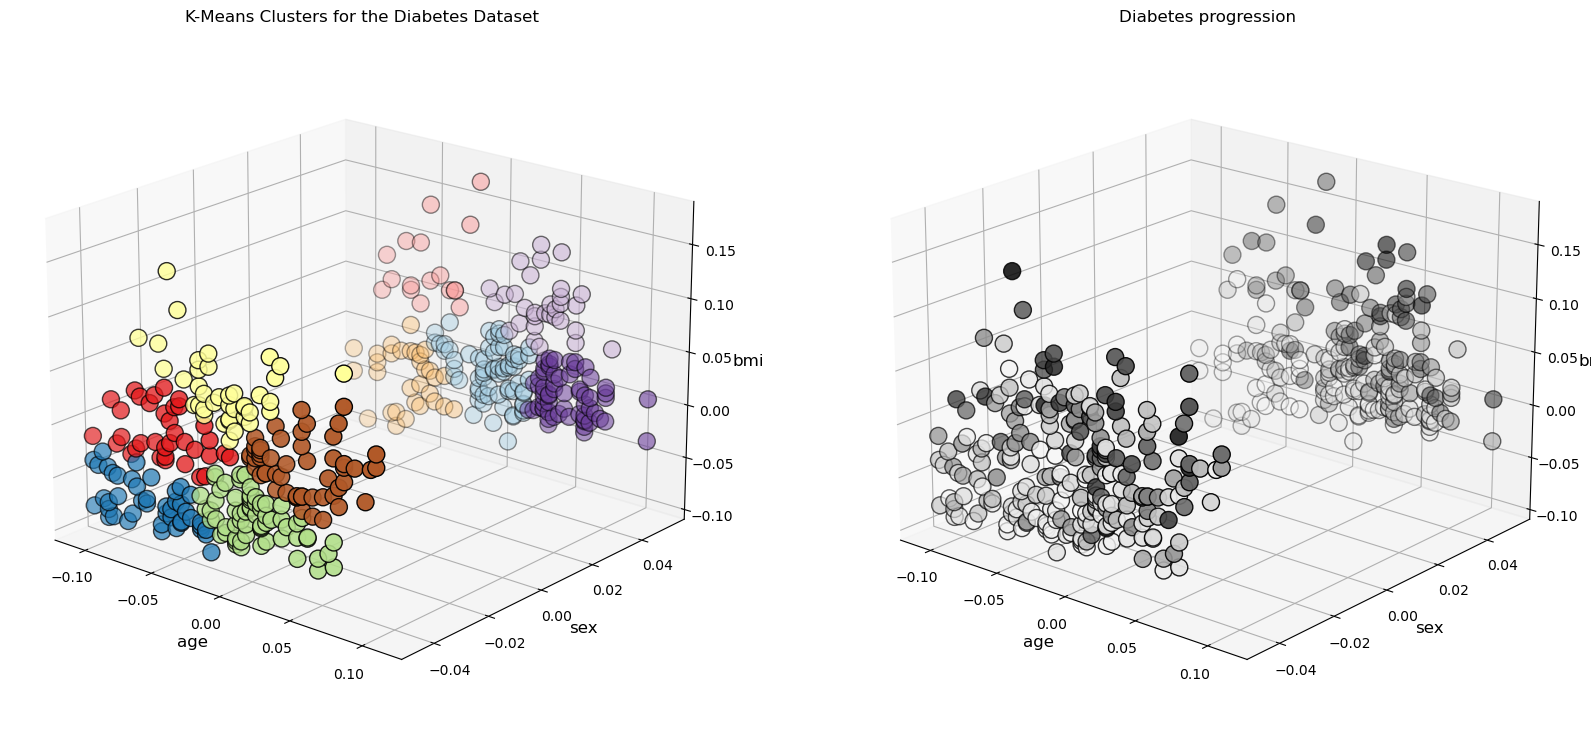

In [25]:
model = KMeans(n_clusters=10, random_state=42) 
diabetes_kmeans = model.fit(X)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], 
            c=diabetes_kmeans.labels_.astype(float), 
           edgecolor="k", s=150, cmap=plt.get_cmap('Paired'))
ax1.view_init(20, -50)
ax1.set_xlabel(names[0], fontsize=12)
ax1.set_ylabel(names[1], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Diabetes Dataset", fontsize=12)
 
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], 
            c=y, edgecolor="k", s=150, 
            cmap=plt.get_cmap('Greys'))
ax2.view_init(20, -50)
ax2.set_xlabel(names[0], fontsize=12)
ax2.set_ylabel(names[1], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Diabetes progression", fontsize=12)
fig.show()